In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
import os
from PIL import Image
import numpy as np
import shutil
import json
from sklearn.metrics import precision_score, recall_score, f1_score

# One Step

## Participant 0

In [5]:
data_path = "../"
one_step_0 = pd.read_excel(data_path + "user_study_annotation_one_step_0.xlsx")
one_step_0.head()

,screen,badge,bottom_app_bar,bottom_sheet,card,carousel,checkbox,chip,common_button,dialog,...,navigation_drawer,radio_button,search,segmented_button,slider,snackbar,switch,tab,text_field,top_app_bar
0,badge_error,1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0
1,badge_anno_one_step,1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,bottom_app_bar_error,-1,1,-1,-2,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,0,-1,-1,-1,-1
3,bottom_app_bar_anno_one_step,-1,1,-1,-2,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
4,bottom_sheet_error,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [6]:
one_step_0.set_index("screen", inplace=True)
one_step_0 = one_step_0.transpose()
one_step_0.head()

screen,badge_error,badge_anno_one_step,bottom_app_bar_error,bottom_app_bar_anno_one_step,bottom_sheet_error,bottom_sheet_anno_one_step,card_error,card_anno_one_step,carousel_error,carousel_anno_one_step,...,snackbar_error,snackbar_anno_one_step,switch_error,switch_anno_one_step,tab_error,tab_anno_one_step,text_field_error,text_field_anno_one_step,top_app_bar_error,top_app_bar_anno_one_step
badge,1,1,-1,-1,-1,-1,0,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,1
bottom_app_bar,-1,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,1
bottom_sheet,-1,-1,-1,-1,1,1,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
card,-1,-1,-2,-2,-1,-1,1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,1
carousel,-1,-1,-1,-1,-1,-1,0,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [7]:
y_preds = []
y_trues = []
true_pos = 0
pred_pos = 0
pred_true_pos = 0
columns = list(one_step_0.columns)
for index, row in one_step_0.iterrows():
    for i in range(0, len(columns), 2):
        y_true = row[columns[i]]
        y_pred = row[columns[i+1]]
        #if y_pred == "X":
        #    y_pred = 0
        if y_true >= 0 and y_pred != "X":
            y_trues.append(y_true)
            y_preds.append(y_pred)
            if y_true == 1:
                true_pos += 1
                if y_pred == 1:
                    pred_true_pos +=1
            if y_pred == 1:
                pred_pos += 1
precision = float(pred_true_pos)/float(pred_pos)
recall = float(pred_true_pos)/float(true_pos)
f1 = 2*(precision*recall)/(precision + recall)
print("PRECISION", precision)
print("RECALL", recall)
print("F1", f1)

PRECISION 0.18085106382978725
RECALL 0.5862068965517241
F1 0.2764227642276423


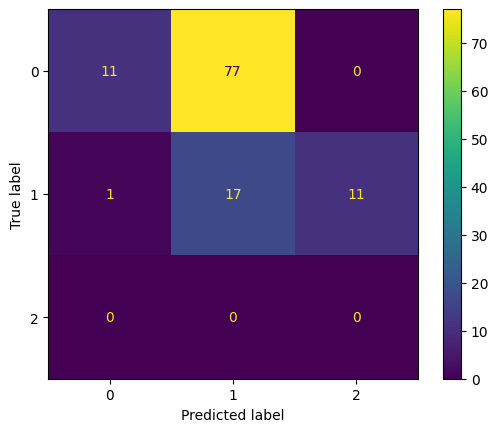

In [8]:
conf_matrix = confusion_matrix(y_trues, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## Participant 1

In [9]:
data_path = "../"
one_step_1 = pd.read_excel(data_path + "user_study_annotation_one_step_1.xlsx")
one_step_1.head(10)

,screen,badge,bottom_app_bar,bottom_sheet,checkbox,chip,common_button,dialog,icon_button,menu,navigation_bar,navigation_drawer,radio_button,slider,snackbar,switch,tab,text_field,top_app_bar
0,badge_error,1,0,-1,-1,-1,-1,-1,-2,-1,0,0,-1,-1,-1,-1,-1,-1,0
1,badge_anno_one_step,1,1,-1,-1,-1,-1,-1,-2,-1,1,1,-1,-1,-1,-1,-1,-1,1
2,bottom_app_bar_error,-1,1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1
3,bottom_app_bar_anno_one_step,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
4,bottom_sheet_error,-1,-1,1,-1,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-1,-1,-1,-1
5,bottom_sheet_anno_one_step,-1,-1,1,-1,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-1,-1,-1,-1
6,card_error,0,-1,0,-1,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-1,-1,-1,-1
7,card_anno_one_step,1,-1,1,-1,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-1,-1,-1,-1
8,carousel_error,-1,-1,0,-1,-1,-1,-1,0,-1,-1,0,-1,-1,-1,-1,0,-1,0
9,carousel_anno_one_step,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1


In [10]:
one_step_1.set_index("screen", inplace=True)
one_step_1 = one_step_1.transpose()
one_step_1.head()

screen,badge_error,badge_anno_one_step,bottom_app_bar_error,bottom_app_bar_anno_one_step,bottom_sheet_error,bottom_sheet_anno_one_step,card_error,card_anno_one_step,carousel_error,carousel_anno_one_step,...,snackbar_error,snackbar_anno_one_step,switch_error,switch_anno_one_step,tab_error,tab_anno_one_step,text_field_error,text_field_anno_one_step,top_app_bar_error,top_app_bar_anno_one_step
badge,1,1,-1,-1,-1,-1,0,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,1
bottom_app_bar,0,1,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,1
bottom_sheet,-1,-1,-1,-1,1,1,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
checkbox,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,-1,-1,-1,-1,0,0
chip,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [11]:
y_preds = []
y_trues = []
true_pos = 0
pred_pos = 0
pred_true_pos = 0
columns = list(one_step_1.columns)
for index, row in one_step_1.iterrows():
    for i in range(0, len(columns), 2):
        y_true = row[columns[i]]
        y_pred = row[columns[i+1]]
        #if y_pred == "X":
        #    y_pred = 0
        if y_true >= 0 and y_pred != "X":
            y_trues.append(y_true)
            y_preds.append(y_pred)
            if y_true == 1:
                true_pos += 1
                if y_pred == 1:
                    pred_true_pos +=1
            if y_pred == 1:
                pred_pos += 1
precision = float(pred_true_pos)/float(pred_pos)
recall = float(pred_true_pos)/float(true_pos)
f1 = 2*(precision*recall)/(precision + recall)
print("PRECISION", precision)
print("RECALL", recall)
print("F1", f1)

PRECISION 0.11594202898550725
RECALL 0.42105263157894735
F1 0.18181818181818182


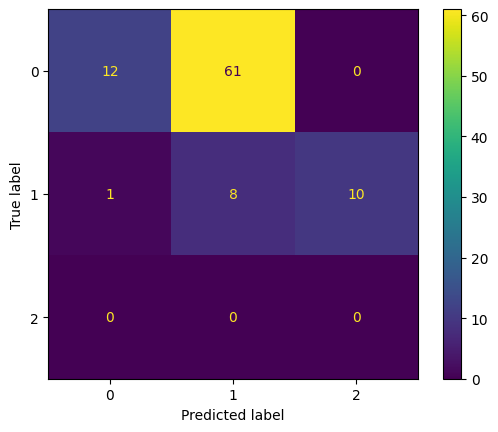

In [12]:
conf_matrix = confusion_matrix(y_trues, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## Both

In [13]:
comp_specs = {}
columns = list(one_step_0.columns)
for i in range(0, len(columns), 2):
    comp_specs[columns[i].replace("_error", "")] = {"y_preds": [], "y_trues": [], "true_pos": 0, "pred_pos": 0, "pred_true_pos": 0}

In [14]:
y_preds = []
y_trues = []
true_pos = 0
pred_pos = 0
pred_true_pos = 0
false_pos = []
true_pos_list = []
false_twos = []
actual_true_pos_list = []
columns = list(one_step_0.columns)
for index, row in one_step_0.iterrows():
    for i in range(0, len(columns), 2):
        y_true = row[columns[i]]
        y_pred = row[columns[i+1]]
        #if y_pred == "X":
        #    y_pred = 0
        if y_true >= 0 and y_pred != "X":
            y_trues.append(y_true)
            y_preds.append(y_pred)
            comp_specs[columns[i].replace("_error", "")]["y_trues"].append(y_true)
            comp_specs[columns[i].replace("_error", "")]["y_preds"].append(y_pred)
            if y_true == 1:
                true_pos += 1
                actual_true_pos_list.append(("0", index, columns[i]))
                comp_specs[columns[i].replace("_error", "")]["true_pos"] += 1
                if y_pred == 1:
                    pred_true_pos += 1
                    true_pos_list.append(("0", index, columns[i]))
                    comp_specs[columns[i].replace("_error", "")]["pred_true_pos"] += 1
                elif y_pred == 2:
                    false_twos.append(("0", index, columns[i]))
            if y_pred == 1:
                pred_pos += 1
                comp_specs[columns[i].replace("_error", "")]["pred_pos"] += 1
                if y_true == 0:
                    false_pos.append(("0", index, columns[i]))

columns = list(one_step_1.columns)
for index, row in one_step_1.iterrows():
    for i in range(0, len(columns), 2):
        y_true = row[columns[i]]
        y_pred = row[columns[i+1]]
        #if y_pred == "X":
        #    y_pred = 0
        if y_true >= 0 and y_pred != "X":
            y_trues.append(y_true)
            y_preds.append(y_pred)
            comp_specs[columns[i].replace("_error", "")]["y_trues"].append(y_true)
            comp_specs[columns[i].replace("_error", "")]["y_preds"].append(y_pred)
            if y_true == 1:
                true_pos += 1
                actual_true_pos_list.append(("1", index, columns[i]))
                comp_specs[columns[i].replace("_error", "")]["true_pos"] += 1
                if y_pred == 1:
                    pred_true_pos += 1
                    true_pos_list.append(("1", index, columns[i]))
                    comp_specs[columns[i].replace("_error", "")]["pred_true_pos"] += 1
                elif y_pred == 2:
                    false_twos.append(("1", index, columns[i]))
            if y_pred == 1:
                pred_pos += 1
                comp_specs[columns[i].replace("_error", "")]["pred_pos"] += 1
                if y_true == 0:
                    false_pos.append(("1", index, columns[i]))

precision = precision_score(y_trues, y_preds, labels=[1], average="micro")#float(pred_true_pos)/float(pred_pos)
recall = recall_score(y_trues, y_preds, labels=[1], average="micro")#float(pred_true_pos)/float(true_pos)
f1 = 2*(precision*recall)/(precision + recall)
print("PRECISION", precision)
print("RECALL", recall)
print("F1", f1)

PRECISION 0.15337423312883436
RECALL 0.5208333333333334
F1 0.23696682464454974


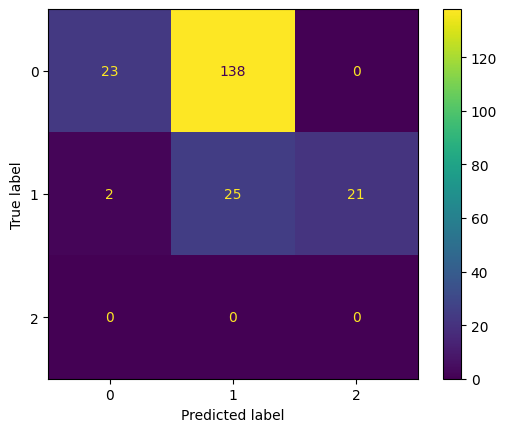

In [15]:
conf_matrix = confusion_matrix(y_trues, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.savefig("../confusion_matrix_one_step.jpg", bbox_inches='tight')
plt.show()

In [16]:
comp_metrics = {"type": [], "f1": [], "recall": [], "precision": [], "true_pos": []}
comp_nums = {}
comp_types = list(sorted(list(comp_specs.keys())))
for comp_type in comp_types:
    print(comp_type)
    y_preds = comp_specs[comp_type]["y_preds"]
    y_trues = comp_specs[comp_type]["y_trues"]
    comp_nums[comp_type] = len(comp_specs[comp_type]["y_preds"])

    try:
        precision =  precision_score(y_trues, y_preds, labels=[1], average="micro")#float(pred_true_pos)/float(pred_pos)
    except:
        precision = 0
    recall = recall_score(y_trues, y_preds, labels=[1], average="micro")#float(pred_true_pos)/float(true_pos)
    f1 = 2*(precision*recall)/(precision + recall)
    if np.isnan(f1):
        f1 = 0

    comp_metrics["type"].append(comp_type)
    comp_metrics["precision"].append(precision)
    comp_metrics["recall"].append(recall)
    comp_metrics["f1"].append(f1)
    comp_metrics["true_pos"].append(sum(y_trues))
    
    print("    PRECISION", precision)
    print("    RECALL", recall)
    print("    F1", f1)

badge
    PRECISION 0.25
    RECALL 1.0
    F1 0.4
bottom_app_bar
    PRECISION 0.3333333333333333
    RECALL 1.0
    F1 0.5
bottom_sheet
    PRECISION 1.0
    RECALL 1.0
    F1 1.0
card
    PRECISION 0.14285714285714285
    RECALL 1.0
    F1 0.25
carousel
    PRECISION 0.07692307692307693
    RECALL 1.0
    F1 0.14285714285714288
checkbox
    PRECISION 0.0
    RECALL 0.0
    F1 0
chip
    PRECISION 0.6666666666666666
    RECALL 1.0
    F1 0.8
common_button
    PRECISION 0.0
    RECALL 0.0
    F1 0
dialog
    PRECISION 1.0
    RECALL 0.5
    F1 0.6666666666666666
divider
    PRECISION 0.14285714285714285
    RECALL 1.0
    F1 0.25
fab
    PRECISION 0.0
    RECALL 0.0
    F1 0
icon_button
    PRECISION 0.0
    RECALL 0.0
    F1 0
list
    PRECISION 0.0
    RECALL 0.0
    F1 0
menu
    PRECISION 1.0
    RECALL 0.5
    F1 0.6666666666666666
navigation_bar
    PRECISION 0.07142857142857142
    RECALL 0.3333333333333333
    F1 0.11764705882352941
navigation_drawer
    PRECISION 0.0
    RECA

C:\Users\thoma\AppData\Local\Temp\ipykernel_6988\372647150.py:15: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2*(precision*recall)/(precision + recall)
C:\Users\thoma\AppData\Local\Temp\ipykernel_6988\372647150.py:15: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2*(precision*recall)/(precision + recall)
C:\Users\thoma\AppData\Local\Temp\ipykernel_6988\372647150.py:15: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2*(precision*recall)/(precision + recall)
C:\Users\thoma\AppData\Local\Temp\ipykernel_6988\372647150.py:15: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2*(precision*recall)/(precision + recall)
C:\Users\thoma\AppData\Local\Temp\ipykernel_6988\372647150.py:15: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2*(precision*recall)/(precision + recall)
C:\Users\thoma\anaconda3\envs\MAtest\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision 

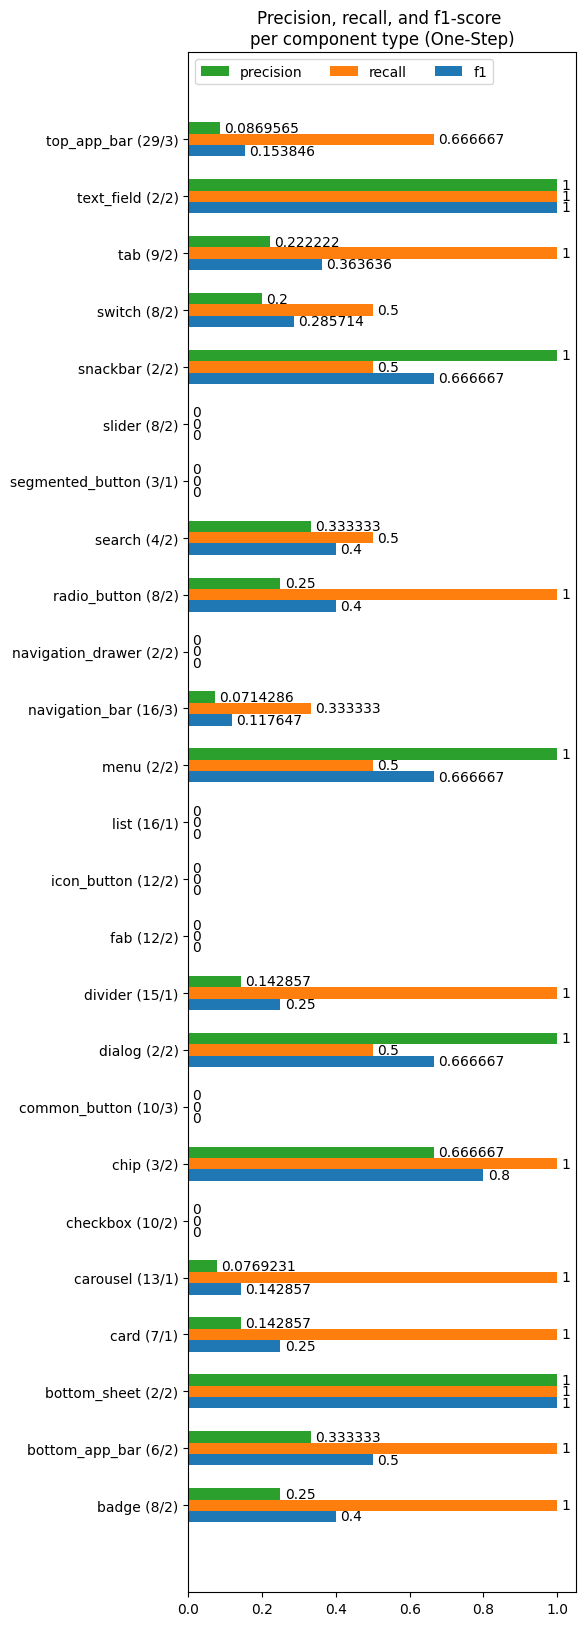

In [17]:
x = np.arange(len(comp_types))*10  # the label locations
width = 2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(5, 20))

for attribute, measurement in comp_metrics.items():
    if attribute != "type" and attribute != "true_pos":
        offset = width * multiplier
        rects = ax.barh(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
    multiplier += 1

titles = []
for attribute, measurement in comp_metrics.items():
    if attribute == "type":
        for i in range(len(measurement)):
            comp_type = measurement[i]
            titles.append(comp_type + " (" + str(comp_nums[comp_type]) + "/" + str(comp_metrics["true_pos"][i]) + ")")
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Precision, recall, and f1-score \nper component type (One-Step)')
ax.set_yticks(x + width*2, titles)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', ncols=3)

plt.savefig("../per_comp_stats_one_step.jpg", bbox_inches='tight')

plt.show()

# Two Step

## Participant 0

In [19]:
data_path = "../"
two_step_0 = pd.read_excel(data_path + "user_study_annotation_two_step_0.xlsx")
two_step_0.head()

,screen,badge,bottom_app_bar,bottom_sheet,card,carousel,checkbox,chip,common_button,dialog,...,navigation_drawer,radio_button,search,segmented_button,slider,snackbar,switch,tab,text_field,top_app_bar
0,badge_error,1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,-1,-1,-1,-1,-1,-1,-1,-1,0
1,badge_anno_two_step,1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,bottom_app_bar_error,-1,1,-1,-2,-1,-1,-1,-1,0,...,-1,-1,-1,-1,-1,0,-1,-1,-1,-1
3,bottom_app_bar_anno_two_step,-1,2,-1,-2,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
4,bottom_sheet_error,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [20]:
two_step_0.set_index("screen", inplace=True)
two_step_0 = two_step_0.transpose()
two_step_0.head()

screen,badge_error,badge_anno_two_step,bottom_app_bar_error,bottom_app_bar_anno_two_step,bottom_sheet_error,bottom_sheet_anno_two_step,card_error,card_anno_two_step,carousel_error,carousel_anno_two_step,...,snackbar_error,snackbar_anno_two_step,switch_error,switch_anno_two_step,tab_error,tab_anno_two_step,text_field_error,text_field_anno_two_step,top_app_bar_error,top_app_bar_anno_two_step
badge,1,1,-1,-1,-1,-1,0,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,1
bottom_app_bar,-1,-1,1,2,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,0
bottom_sheet,-1,-1,-1,-1,1,1,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
card,-1,-1,-2,-2,-1,-1,1,2,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,1
carousel,-1,-1,-1,-1,-1,-1,0,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [21]:
y_preds = []
y_trues = []
true_pos = 0
pred_pos = 0
pred_true_pos = 0
columns = list(two_step_0.columns)
for index, row in two_step_0.iterrows():
    for i in range(0, len(columns), 2):
        y_true = row[columns[i]]
        y_pred = row[columns[i+1]]
        if y_true >= 0 and y_pred != "X":
            y_trues.append(y_true)
            y_preds.append(y_pred)
            if y_pred == "X":
                y_pred = 0
            if y_true == 1:
                true_pos += 1
                if y_pred == 1:
                    pred_true_pos +=1
            if y_pred == 1:
                pred_pos += 1
precision = float(pred_true_pos)/float(pred_pos)
recall = float(pred_true_pos)/float(true_pos)
f1 = 2*(precision*recall)/(precision + recall)
print("PRECISION", precision)
print("RECALL", recall)
print("F1", f1)

PRECISION 0.15625
RECALL 0.5172413793103449
F1 0.24


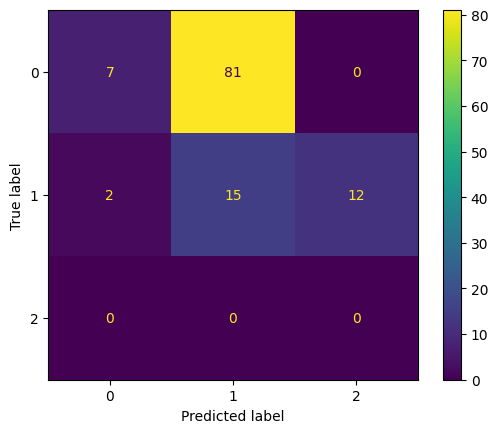

In [22]:
conf_matrix = confusion_matrix(y_trues, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## Participant 1

In [23]:
data_path = "../"
two_step_1 = pd.read_excel(data_path + "user_study_annotation_two_step_1.xlsx")
two_step_1.head()

,screen,badge,bottom_app_bar,bottom_sheet,checkbox,chip,common_button,dialog,icon_button,menu,navigation_bar,navigation_drawer,radio_button,slider,snackbar,switch,tab,text_field,top_app_bar
0,badge_error,1,0,-1,-1,-1,-1,-1,-2,-1,0,0,-1,-1,-1,-1,-1,-1,0
1,badge_anno_two_step,1,0,-1,-1,-1,-1,-1,-2,-1,1,1,-1,-1,-1,-1,-1,-1,1
2,bottom_app_bar_error,-1,1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1
3,bottom_app_bar_anno_two_step,-1,2,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1
4,bottom_sheet_error,-1,-1,1,-1,-1,-1,-1,-1,-2,-2,-1,-1,-1,-1,-1,-1,-1,-1


In [24]:
two_step_1.set_index("screen", inplace=True)
two_step_1 = two_step_1.transpose()
two_step_1.head()

screen,badge_error,badge_anno_two_step,bottom_app_bar_error,bottom_app_bar_anno_two_step,bottom_sheet_error,bottom_sheet_anno_two_step,card_error,card_anno_two_step,carousel_error,carousel_anno_two_step,...,snackbar_error,snackbar_anno_two_step,switch_error,switch_anno_two_step,tab_error,tab_anno_two_step,text_field_error,text_field_anno_two_step,top_app_bar_error,top_app_bar_anno_two_step
badge,1,1,-1,-1,-1,-1,0,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,1
bottom_app_bar,0,0,1,2,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,1
bottom_sheet,-1,-1,-1,-1,1,1,0,1,0,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
checkbox,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,1,-1,-1,-1,-1,0,0
chip,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [25]:
y_preds = []
y_trues = []
true_pos = 0
pred_pos = 0
pred_true_pos = 0
columns = list(two_step_1.columns)
for index, row in two_step_1.iterrows():
    for i in range(0, len(columns), 2):
        y_true = row[columns[i]]
        y_pred = row[columns[i+1]]
        #if y_pred == "X":
        #    y_pred = 0
        if y_true >= 0 and y_pred != "X":
            y_trues.append(y_true)
            y_preds.append(y_pred)
            if y_true == 1:
                true_pos += 1
                if y_pred == 1:
                    pred_true_pos +=1
            if y_pred == 1:
                pred_pos += 1
precision = float(pred_true_pos)/float(pred_pos)
recall = float(pred_true_pos)/float(true_pos)
f1 = 2*(precision*recall)/(precision + recall)
print("PRECISION", precision)
print("RECALL", recall)
print("F1", f1)

PRECISION 0.11842105263157894
RECALL 0.47368421052631576
F1 0.1894736842105263


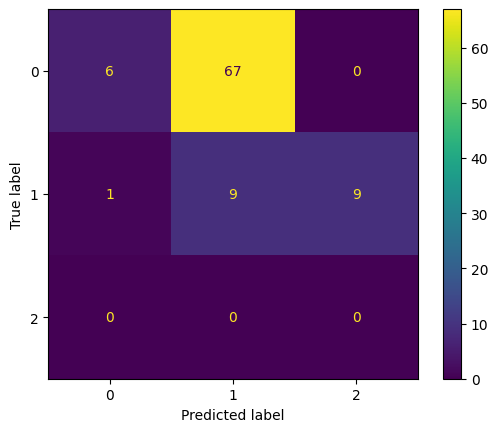

In [26]:
conf_matrix = confusion_matrix(y_trues, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

## Both

In [27]:
comp_specs = {}
columns = list(two_step_0.columns)
for i in range(0, len(columns), 2):
    comp_specs[columns[i].replace("_error", "")] = {"y_preds": [], "y_trues": [], "true_pos": 0, "pred_pos": 0, "pred_true_pos": 0}

In [28]:
y_preds = []
y_trues = []
true_pos = 0
pred_pos = 0
pred_true_pos = 0
false_pos_ts = []
true_pos_list_ts = []
false_twos_ts = []
actual_true_pos_list_ts = []
columns = list(two_step_0.columns)
for index, row in two_step_0.iterrows():
    for i in range(0, len(columns), 2):
        y_true = row[columns[i]]
        y_pred = row[columns[i+1]]
        #if y_pred == "X":
        #    y_pred = 0
        if y_true >= 0 and y_pred != "X":
            y_trues.append(y_true)
            y_preds.append(y_pred)
            comp_specs[columns[i].replace("_error", "")]["y_trues"].append(y_true)
            comp_specs[columns[i].replace("_error", "")]["y_preds"].append(y_pred)
            if y_true == 1:
                true_pos += 1
                actual_true_pos_list_ts.append(("0", index, columns[i]))
                comp_specs[columns[i].replace("_error", "")]["true_pos"] += 1
                if y_pred == 1:
                    pred_true_pos += 1
                    true_pos_list_ts.append(("0", index, columns[i]))
                    comp_specs[columns[i].replace("_error", "")]["pred_true_pos"] += 1
                elif y_pred == 2:
                    false_twos_ts.append(("0", index, columns[i]))
            if y_pred == 1:
                pred_pos += 1
                comp_specs[columns[i].replace("_error", "")]["pred_pos"] += 1
                if y_true == 0:
                    false_pos_ts.append(("0", index, columns[i]))

columns = list(two_step_1.columns)
for index, row in two_step_1.iterrows():
    for i in range(0, len(columns), 2):
        y_true = row[columns[i]]
        y_pred = row[columns[i+1]]
        #if y_pred == "X":
        #    y_pred = 0
        if y_true >= 0 and y_pred != "X":
            y_trues.append(y_true)
            y_preds.append(y_pred)
            comp_specs[columns[i].replace("_error", "")]["y_trues"].append(y_true)
            comp_specs[columns[i].replace("_error", "")]["y_preds"].append(y_pred)
            if y_true == 1:
                true_pos += 1
                actual_true_pos_list_ts.append(("1", index, columns[i]))
                comp_specs[columns[i].replace("_error", "")]["true_pos"] += 1
                if y_pred == 1:
                    pred_true_pos += 1
                    true_pos_list_ts.append(("1", index, columns[i]))
                    comp_specs[columns[i].replace("_error", "")]["pred_true_pos"] += 1
                elif y_pred == 2:
                    false_twos_ts.append(("1", index, columns[i]))
            if y_pred == 1:
                pred_pos += 1
                comp_specs[columns[i].replace("_error", "")]["pred_pos"] += 1
                if y_true == 0:
                    false_pos_ts.append(("1", index, columns[i]))

precision = precision_score(y_trues, y_preds, labels=[1], average="micro")#float(pred_true_pos)/float(pred_pos)
recall = recall_score(y_trues, y_preds, labels=[1], average="micro")#float(pred_true_pos)/float(true_pos)
f1 = 2*(precision*recall)/(precision + recall)
print("PRECISION", precision)
print("RECALL", recall)
print("F1", f1)

PRECISION 0.13953488372093023
RECALL 0.5
F1 0.21818181818181817


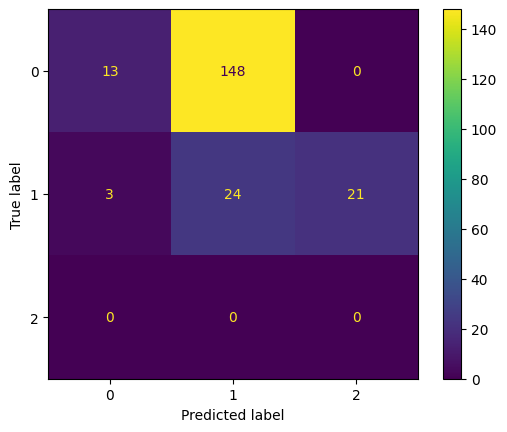

In [29]:
conf_matrix = confusion_matrix(y_trues, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.savefig("../confusion_matrix_two_step.jpg", bbox_inches='tight')
plt.show()

In [31]:
comp_metrics = {"type": [], "f1": [], "recall": [], "precision": [], "true_pos": []}
comp_nums = {}
comp_types = list(sorted(list(comp_specs.keys())))
for comp_type in comp_types:
    print(comp_type)
    y_preds = comp_specs[comp_type]["y_preds"]
    y_trues = comp_specs[comp_type]["y_trues"]
    comp_nums[comp_type] = len(comp_specs[comp_type]["y_preds"])

    try:
        precision =  precision_score(y_trues, y_preds, labels=[1], average="micro")#float(pred_true_pos)/float(pred_pos)
    except:
        precision = 0
    recall = recall_score(y_trues, y_preds, labels=[1], average="micro")#float(pred_true_pos)/float(true_pos)
    f1 = 2*(precision*recall)/(precision + recall)
    if np.isnan(f1):
        f1 = 0

    comp_metrics["type"].append(comp_type)
    comp_metrics["precision"].append(precision)
    comp_metrics["recall"].append(recall)
    comp_metrics["f1"].append(f1)
    comp_metrics["true_pos"].append(sum(y_trues))
    
    print("    PRECISION", precision)
    print("    RECALL", recall)
    print("    F1", f1)

badge
    PRECISION 0.2857142857142857
    RECALL 1.0
    F1 0.4444444444444445
bottom_app_bar
    PRECISION 0.0
    RECALL 0.0
    F1 0
bottom_sheet
    PRECISION 1.0
    RECALL 1.0
    F1 1.0
card
    PRECISION 0.0
    RECALL 0.0
    F1 0
carousel
    PRECISION 0.08333333333333333
    RECALL 1.0
    F1 0.15384615384615385
checkbox
    PRECISION 0.0
    RECALL 0.0
    F1 0
chip
    PRECISION 0.6666666666666666
    RECALL 1.0
    F1 0.8
common_button
    PRECISION 0.0
    RECALL 0.0
    F1 0
dialog
    PRECISION 1.0
    RECALL 0.5
    F1 0.6666666666666666
divider
    PRECISION 0.08333333333333333
    RECALL 1.0
    F1 0.15384615384615385
fab
    PRECISION 0.0
    RECALL 0.0
    F1 0
icon_button
    PRECISION 0.0
    RECALL 0.0
    F1 0
list
    PRECISION 0.0625
    RECALL 1.0
    F1 0.11764705882352941
menu
    PRECISION 1.0
    RECALL 0.5
    F1 0.6666666666666666
navigation_bar
    PRECISION 0.0
    RECALL 0.0
    F1 0
navigation_drawer
    PRECISION 1.0
    RECALL 0.5
    F1 0.6666

C:\Users\thoma\AppData\Local\Temp\ipykernel_6988\372647150.py:15: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2*(precision*recall)/(precision + recall)
C:\Users\thoma\AppData\Local\Temp\ipykernel_6988\372647150.py:15: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2*(precision*recall)/(precision + recall)
C:\Users\thoma\AppData\Local\Temp\ipykernel_6988\372647150.py:15: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2*(precision*recall)/(precision + recall)
C:\Users\thoma\AppData\Local\Temp\ipykernel_6988\372647150.py:15: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2*(precision*recall)/(precision + recall)
C:\Users\thoma\AppData\Local\Temp\ipykernel_6988\372647150.py:15: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2*(precision*recall)/(precision + recall)
C:\Users\thoma\AppData\Local\Temp\ipykernel_6988\372647150.py:15: RuntimeWarning: invalid value encountered in scalar divide
  f1 

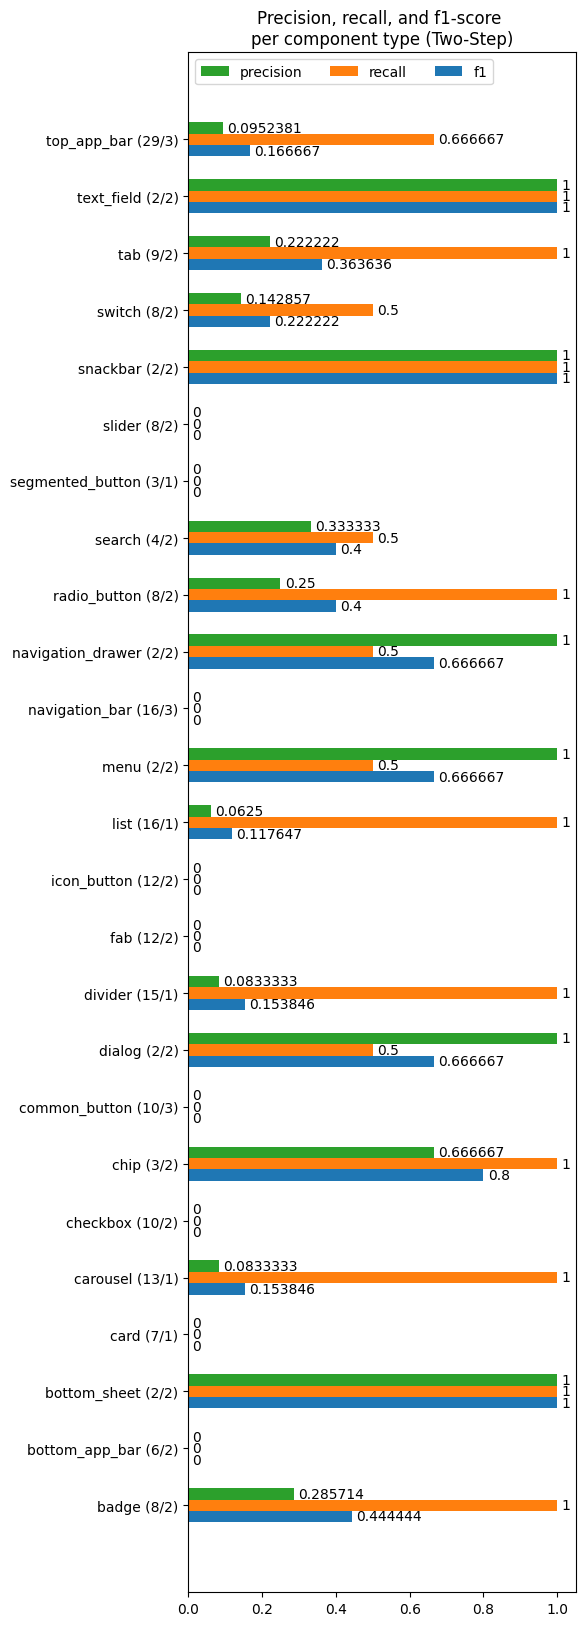

In [32]:
x = np.arange(len(comp_types))*10  # the label locations
width = 2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(5, 20))

for attribute, measurement in comp_metrics.items():
    if attribute != "type" and attribute != "true_pos":
        offset = width * multiplier
        rects = ax.barh(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
    multiplier += 1

titles = []
for attribute, measurement in comp_metrics.items():
    if attribute == "type":
        for i in range(len(measurement)):
            comp_type = measurement[i]
            titles.append(comp_type + " (" + str(comp_nums[comp_type]) + "/" + str(comp_metrics["true_pos"][i]) + ")")
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Precision, recall, and f1-score \nper component type (Two-Step)')
ax.set_yticks(x + width*2, titles)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', ncols=3)

plt.savefig("../per_comp_stats_two_step.jpg", bbox_inches='tight')

plt.show()

# Error rate

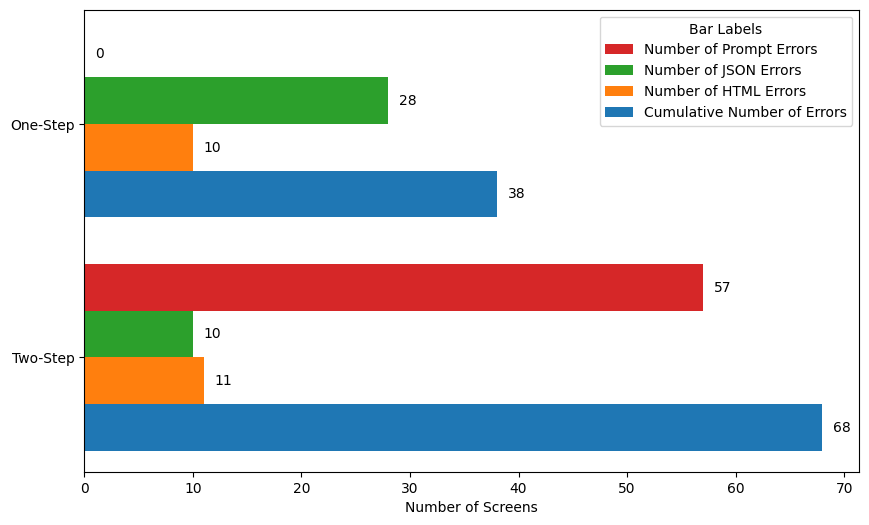

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Data
group_labels = ['Two-Step', 'One-Step']
bars_group_2 = [38, 10, 28, 0]
bars_group_1 = [68, 11, 10, 57]

# Bar labels
bar_labels = ["Cumulative Number of Errors", "Number of HTML Errors", "Number of JSON Errors", "Number of Prompt Errors"]

# Number of groups
n_groups = len(group_labels)
index = np.arange(n_groups)

# Width of the bars
bar_width = 0.2

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each bar label
for i in range(len(bar_labels)):
    #ax.barh(index + i * bar_width, [bars_group_1[i], bars_group_2[i]], height=bar_width, label=bar_labels[i])
    bars = ax.barh(index + i * bar_width, [bars_group_1[i], bars_group_2[i]], 
                   height=bar_width, label=bar_labels[i])

    for bar in bars:
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
                f'{bar.get_width()}', va='center')

# Set the y-axis labels
ax.set_yticks(index + bar_width * (len(bar_labels) - 1) / 2)
ax.set_yticklabels(group_labels)

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Bar Labels')#, bbox_to_anchor=(0.75, 0.3))

# Label axes
ax.set_xlabel('Number of Screens')

plt.savefig("../error_counts.png", bbox_inches='tight')

# Show the plot
plt.show()
